<h2 align='center'>  Regresión Logística </h2> 

## Grafica

In [7]:
import numpy as np
from matplotlib import pyplot as plt

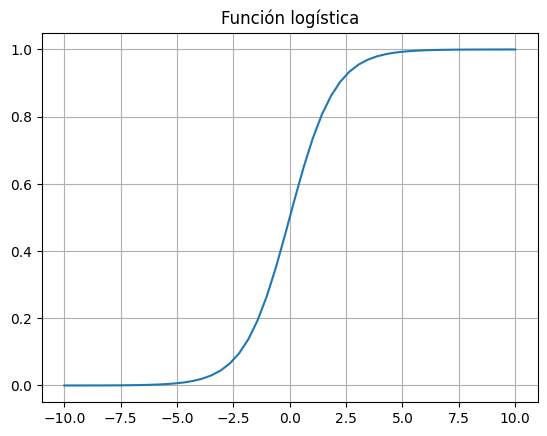

In [8]:
x = np.linspace(-10,10)
y = 1/(1+np.exp(-x))
plt.plot(x,y)
plt.title('Función logística')
plt.grid()
plt.axis
plt.show()

## Tipos de modelos de Regresión Logística

* **Regresión Logística Binaria:** la variable objetivo tiene solo dos resultados posible, Llueve o NO Llueve, Sube o Baja.
* **Regresión Logística Multinomial:** la variable objetivo tiene tres o más categorías nominales, como predecir el tipo de vino.
* **Regresión Logística Ordinal:** la variable objetivo tiene tres o más categorías ordinales, como clasificar un restaurante o un producto del 1 al 5

# Jugar con BDD

In [175]:
import pandas as pd

In [176]:
#dataframe = pd.read_csv('../bdd/usuarios_win_mac_lin.csv')
dataframe = pd.read_excel('../bdd/bdd.xlsx')

### Dataset

In [177]:
dataframe.head(10)

,Code,Localization,Severity,SEX,Age,Cardiac FQ,Systolic BP,Diastolic BP,Glucose,Hb A/C %,...,RANKIN admission,NIHSS dismissed,RANKIN dismissed,NIHSS 6 months,RANKIN 6 months,PROGNOSIS,VEGF/mL,PLGF/mL,IL-6 (pg/ml),exosomas
0,1,TACI,Major,1,53,78,162,64,137.09,5.9,...,5,42,6,2,6,Bad,448.22265,71.993015,18.586835,NaN
1,2,TIA,Mild,1,54,56,130,89,136.00,6.5,...,5,0,2,0,2,Good,302.91950,122.437550,1.263441,NaN
2,3,LACI,Mild,2,78,91,152,75,359.42,13.8,...,3,2,1,2,2,Missing,284.52795,127.826050,49.091862,3.337500e+10
3,4,LACI,Mild,2,87,59,136,86,186.20,5.9,...,4,0,2,0,2,Good,428.41470,108.966435,96.544126,NaN
4,5,POCI,Major,1,69,104,154,95,170.00,16.7,...,4,2,1,0,1,Good,221.23940,117.647850,43.309864,1.349900e+10
5,6,PACI,Major,2,90,55,216,84,160.95,12.3,...,4,1,5,1,2,Good,165.52390,128.574450,4.897850,1.781250e+10
6,8,POCI,Major,1,90,78,180,80,123.00,5.6,...,5,8,4,6,4,Bad,299.13300,138.602950,13.519904,NaN
7,11,POCI,Major,1,55,68,121,66,136.00,13.4,...,3,3,1,0,0,Good,168.76940,173.627850,0.528827,2.142500e+10
8,12,TACI,Major,2,83,64,177,92,113.80,14.2,...,5,10,5,8,4,Bad,355.38945,123.185950,2.114048,1.250000e+10
9,14,PACI,Major,2,70,59,120,60,216.61,13.8,...,3,1,0,2,1,Good,131.98635,157.013500,52.680689,2.331250e+10


In [178]:
dataframe.iloc[-1] # Última fila

Code                         TENS
Localization                 LACI
Severity                     Mild
SEX                             1
Age                            69
Cardiac FQ                     64
Systolic BP                   194
Diastolic BP                  105
Glucose                    217.21
Hb A/C  %                    10.0
Total Cholest                 202
TRIGLICERIDOS                 232
LDL                           124
HDL                            30
HCTO                         41.3
HB                           13.6
Platelets                     214
INR                          1.03
Leucocytes                   10.4
C.R.P                       18.69
Ureic nitrogen              25.68
Uremia                      54.96
Creatinin                    1.12
TTPA                         24.1
TP                           10.5
NA (sodium)                135.93
K (potassium)                4.25
CL (Chloride)              143.99
Fosfatase Alcalin          102.38
Gamma glutamil

In [197]:
#columnas = ['PCR','INR', 'TTPK', 'Tiempo protombina', 'Functional outcome numérico'] # Columnas a trabajar
columnas = ['SEX', 'Age', 'Cardiac FQ', 'Systolic BP', 'Diastolic BP', 'Hb A/C  %', 'Total Cholest', 'TRIGLICERIDOS', 'LDL', 'HDL', 'HCTO', 'HB', 'Platelets', 'INR', 'Leucocytes', 'C.R.P', 'Ureic nitrogen', 'Uremia', 'Creatinin', 'TTPA', 'TP', 'NA (sodium)', 'CL (Chloride)', 'Fosfatase Alcalin', 'Gamma glutamil', 'GLASGOW at admission'] # Columnas a trabajar 'Severity',, 'Diastolic BP', 'Hb A/C  %', 'Total Cholest', 'TRIGLICERIDOS', 'LDL', 'HDL', 'HCTO', 'HB', 'Platelets', 'INR', 'Leucocytes', 'C.R.P', 'Ureic nitrogen', 'Uremia', 'Creatinin', 'TTPA', 'TP', 'NA (sodium)', 'CL (Chloride)', 'Fosfatase Alcalin', 'Gamma glutamil', 'GLASGOW at admission'
dataset = dataframe[[*columnas]]
dataset.head(5)

,SEX,Age,Cardiac FQ,Systolic BP,Diastolic BP,Hb A/C %,Total Cholest,TRIGLICERIDOS,LDL,HDL,...,Ureic nitrogen,Uremia,Creatinin,TTPA,TP,NA (sodium),CL (Chloride),Fosfatase Alcalin,Gamma glutamil,GLASGOW at admission
0,1,53,78,162,64,5.9,268,130,202,40,...,21.13,45.22,0.93,21.8,11.0,137.83,101.88,81.53,41.66,11
1,1,54,56,130,89,6.5,187,130,118,44,...,18.00,39.00,0.90,31.0,16.0,139.00,102.00,98.00,40.00,15
2,2,78,91,152,75,13.8,159,97,26,35,...,12.68,27.14,0.74,26.3,9.8,137.00,101.00,80.38,130.39,15
3,2,87,59,136,86,5.9,193,133,115,51,...,24.10,51.60,0.92,27.2,10.1,137.10,106.45,120.20,33.95,15
4,1,69,104,154,95,16.7,184,137,125,32,...,16.69,35.72,1.05,24.2,13.0,137.70,103.80,98.00,40.00,15


### Numero Funcional de Salida

In [198]:
print(dataset.groupby('Age').size())

Age
38    1
52    1
53    1
54    2
55    1
57    1
58    1
60    1
62    2
65    1
67    1
68    1
69    2
70    1
71    3
72    3
73    2
75    1
77    1
78    2
79    2
80    3
82    3
83    2
85    1
87    2
90    3
dtype: int64


C:\Users\Abraham\AppData\Local\Temp\ipykernel_439508\2337487530.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset.drop(['Age'],1).hist()


<Figure size 1700x500 with 0 Axes>

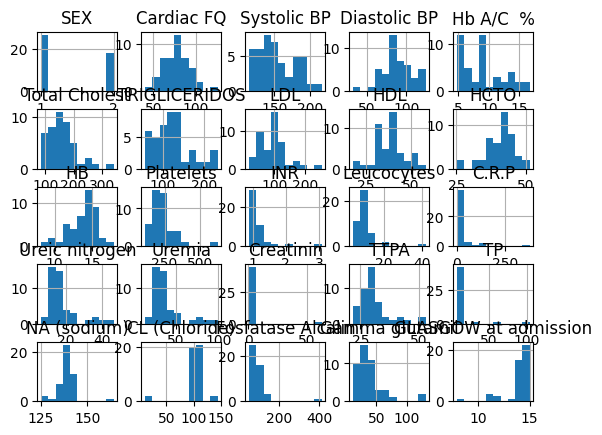

In [199]:
plt.figure(figsize=(17,5))
dataset.drop(['Age'],1).hist()
plt.show()

# Funciona para pocas columnas, pero es util para ver como estan respecto a la columna tomada.Distribucion respecto a la clase

# Modelo

In [200]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split #separa las metricas
from sklearn import metrics

In [224]:
modelo_RL = linear_model.LogisticRegression(solver='lbfgs', max_iter=2000)

In [225]:
X = dataset.drop('Age',axis=1)

In [226]:
Y = dataset['Age']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.80,random_state=1)

In [228]:
modelo_RL.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

## Prediccion

In [229]:
prediccion = modelo_RL.predict(X_test)

## Evaluacion del Modelo

In [230]:
print("Matriz de Confusión :\n",metrics.confusion_matrix(y_test, prediccion))
# Para saber los aciertos que tiene

Matriz de Confusión :
 [[0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


In [231]:
print("Tasa de acierto: {:4f}".format(metrics.accuracy_score(y_test,prediccion)))

Tasa de acierto: 0.000000


In [232]:
print('Reporte de clasificacion:\n')
print(metrics.classification_report(y_test, prediccion))

Reporte de clasificacion:

              precision    recall  f1-score   support

          54       0.00      0.00      0.00       0.0
          58       0.00      0.00      0.00       1.0
          62       0.00      0.00      0.00       0.0
          70       0.00      0.00      0.00       0.0
          71       0.00      0.00      0.00       2.0
          72       0.00      0.00      0.00       2.0
          73       0.00      0.00      0.00       1.0
          78       0.00      0.00      0.00       1.0
          79       0.00      0.00      0.00       0.0
          80       0.00      0.00      0.00       1.0
          87       0.00      0.00      0.00       1.0
          90       0.00      0.00      0.00       0.0

    accuracy                           0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00      0.00      0.00       9.0



C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

## Hasta aqui